In [200]:
import glworia.amplification_factor
import glworia.lens_functions
from glworia.amplification_factor import *
from glworia.lens_functions import *
import glworia.lens_functions
from glworia.lens_functions import *
import glworia.contour
from glworia.contour import *
import glworia.utils
from glworia.utils import *
import glworia.root
from glworia.root import *
import glworia.plot
from glworia.plot import *
import glworia.frequency_domain
from glworia.frequency_domain import *
import glworia.interpolate
from glworia.interpolate import *
import glworia.load_interp
from glworia.load_interp import *

In [201]:
from importlib import reload

In [202]:
reload(glworia.amplification_factor)
reload(glworia.lens_functions)
from glworia.amplification_factor import *
from glworia.lens_functions import *
reload(glworia.lens_functions)
from glworia.lens_functions import *
reload(glworia.contour)
from glworia.contour import *
reload(glworia.utils)
from glworia.utils import *
reload(glworia.root)
from glworia.root import *
reload(glworia.plot)
from glworia.plot import *
reload(glworia.frequency_domain)
from glworia.frequency_domain import *
reload(glworia.interpolate)
from glworia.interpolate import *
reload(glworia.load_interp)
from glworia.load_interp import *

In [203]:
import matplotlib as mpl

plt.rc('text', usetex=False)
plt.rc('font', family='qpl')
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['ytick.minor.size'] = 2

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.left'] = plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.labeltop'] = plt.rcParams['ytick.labelright'] = False
mpl.rcParams['axes.unicode_minus'] = False

params = {'axes.labelsize': 18,
          'font.family': 'serif',
          'font.size': 9,
          'legend.fontsize': 12,
          'xtick.labelsize': 11,
          'ytick.labelsize': 11,
          'savefig.dpi': 200,
          'lines.markersize': 6,
          'axes.formatter.limits': (-3, 3)}

mpl.rcParams.update(params)

In [204]:
from jax.config import config
config.update("jax_enable_x64", True)

In [205]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import random

In [230]:
# use tex
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [210]:
lp_name = 'kappa'

settings = {
    'lens_param_name': lp_name,
    'y_low': 0.1,
    'y_high': 5.0,
    lp_name + '_low': 0.1,
    lp_name + '_high': 10.,
    'N_grid': 30,
    'N_grid_strong': 60,
    'N_crit': 60,
    'N': 200,
    'lens_model_name': 'NFW',

    'T0_max': 1000,

    'y_low_im': 0.1,
    'y_high_im': 5.0,
    lp_name + '_low_im': 0.1,
    lp_name + '_high_im': 10.,
    'N_grid_im': 1000,
    'N_crit_im': 1000,
}

grid_settings = settings.copy()
grid_settings['lp_low'] = settings[lp_name + '_low']
grid_settings['lp_high'] = settings[lp_name + '_high']
grid_settings.update(
    crit_lp_N = 100000,
    crit_bisect_x_low = -10,
    crit_bisect_x_high = 10,
    crit_bisect_x_num = 100,
    crit_screen_round_decimal = 8)

In [211]:
weak_points, strong_points, crit_points_in_bound, _, lp_to_y_crit = make_grid_points(grid_settings)
weak_points_mid, strong_points_mid, crit_points_in_bound_mid, _, _ = make_grid_points(grid_settings, mid_point = True)

In [212]:
lp_arr = np.linspace(settings[lp_name + '_low'], settings[lp_name + '_high'], settings['N_grid'])

In [213]:
y_crit_arr = lp_to_y_crit(lp_arr)
fac = 0.2
y_crit_low_arr = y_crit_arr * (1 - fac)
y_crit_high_arr = y_crit_arr * (1 + fac)

Text(0, 0.5, '$\\kappa$')

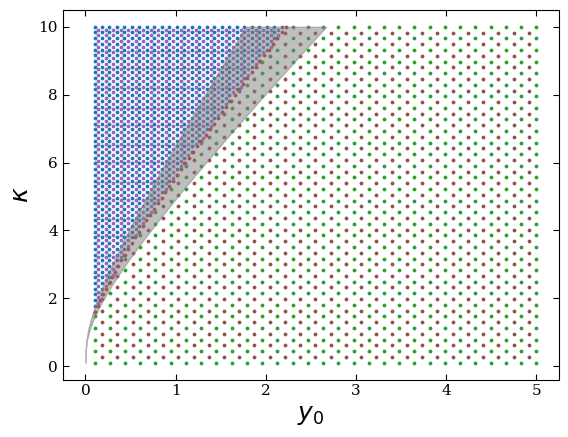

In [214]:
fig, ax = plt.subplots()
ax.scatter(strong_points.T[0], strong_points.T[1], s = 3)
ax.scatter(weak_points.T[0], weak_points.T[1], s = 3, c = 'C2')
ax.scatter(crit_points_in_bound.T[0], crit_points_in_bound.T[1], s = 3, c = 'C3')
ax.scatter(strong_points_mid.T[0], strong_points_mid.T[1], s = 3, c = 'C4')
ax.scatter(weak_points_mid.T[0], weak_points_mid.T[1], s = 3, c = 'C5')
ax.fill_betweenx(lp_arr, y_crit_low_arr, y_crit_high_arr, alpha = 0.5, color = 'gray')

ax.set_xlabel(r'$y_0$')
ax.set_ylabel(r'$\kappa$')

In [218]:
test_num = 20
test_weak_points_indx = []
test_strong_points_indx = []

random.seed(1234)

while len(test_weak_points_indx) < test_num:
    choice = random.randint(0, len(weak_points_mid) - 1)
    if choice not in test_weak_points_indx:
        if weak_points_mid[choice][0] > lp_to_y_crit(weak_points_mid[choice][1])*(1 + fac):
            test_weak_points_indx.append(choice)

while len(test_strong_points_indx) < test_num:
    choice = random.randint(0, len(strong_points_mid) - 1)
    if choice not in test_strong_points_indx:
        if strong_points_mid[choice][0] < lp_to_y_crit(strong_points_mid[choice][1])*(1 - fac):
            test_strong_points_indx.append(choice)

test_weak_points_indx = np.array(test_weak_points_indx)
test_strong_points_indx = np.array(test_strong_points_indx)

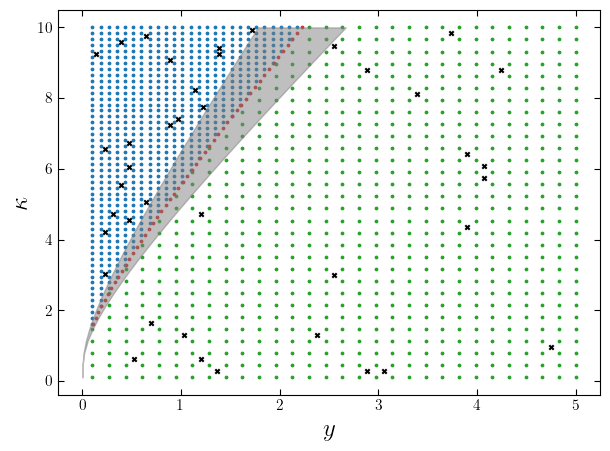

In [233]:
fig, ax = plt.subplots(figsize = (7, 5))
ax.scatter(strong_points.T[0], strong_points.T[1], s = 3)
ax.scatter(weak_points.T[0], weak_points.T[1], s = 3, c = 'C2')
ax.scatter(crit_points_in_bound.T[0], crit_points_in_bound.T[1], s = 3, c = 'C3')
# ax.scatter(strong_points_mid.T[0], strong_points_mid.T[1], s = 3, c = 'C4')
# ax.scatter(weak_points_mid.T[0], weak_points_mid.T[1], s = 3, c = 'C5')
ax.fill_betweenx(lp_arr, y_crit_low_arr, y_crit_high_arr, alpha = 0.5, color = 'gray')
ax.scatter(strong_points_mid[test_strong_points_indx].T[0], strong_points_mid[test_strong_points_indx].T[1], s = 10, c = 'k', marker = 'x')
ax.scatter(weak_points_mid[test_weak_points_indx].T[0], weak_points_mid[test_weak_points_indx].T[1], s = 10, c = 'k', marker = 'x')

ax.set_xlabel(r'$y$')
ax.set_ylabel(r'$\kappa$')

plt.savefig('./plots/interpolation_test_points.pdf', bbox_inches = 'tight')

# NFW profile

In [220]:
@jit
def Psi_NFW(x, lens_params):
    kappa = lens_params[0]
    x_norm = jnp.linalg.norm(x)
    dim_1 = jnp.ones(x.shape)
    x_safe_low = jnp.where(x_norm<1, x, 0.5*dim_1)
    x_safe_hi = jnp.where(x_norm<1, 2*dim_1, x)
    x_safe_low_norm = jnp.linalg.norm(x_safe_low)
    x_safe_hi_norm = jnp.linalg.norm(x_safe_hi)
    Psi = jnp.where(x_norm<1,
        kappa / 2 * (jnp.log(x_safe_low_norm/2)**2 - jnp.arctanh(jnp.sqrt(1-x_safe_low_norm**2))**2),
        kappa / 2 * (jnp.log(x_safe_hi_norm/2)**2 + jnp.arctan(jnp.sqrt(x_safe_hi_norm**2 - 1))**2))
    return Psi

In [221]:
interpolators = load_interpolators('./interpolation', **settings)
w_interp = np.linspace(0.01, 1e3, 10**5)

In [222]:
T_funcs, helper_funcs = amplification_computation_prep(Psi_NFW)
crit_curve_helper_funcs = make_crit_curve_helper_func(T_funcs)
param_arr = jnp.linspace(0.1, 10., 100000)
crit_funcs = crtical_curve_interpolants(param_arr, T_funcs, crit_curve_helper_funcs)
N = 200
T0_max = 1000.

F_from_interpolation = []
F_direct_calculation = []
mu = []

test_weak_points = np.array([weak_points_mid[test_weak_points_indx]])[0]

for point in test_weak_points:
    y_interp = point[0]
    lp_interp = point[1]
    F, F_g, partitions, T_im, mu_im, u0, u1, u2, u3, um, w1, F1, w2, F2 = F_interp(w_interp, y_interp, lp_interp, interpolators, settings,
                return_geom = True, 
                )
    F_from_interpolation.append(F)
    y = jnp.array([y_interp, 0])
    lens_params = jnp.array([lp_interp])
    F_interpolated, F_interp_raw, contour_obj, partitions = compute_F(w_interp, y, lens_params, T_funcs, helper_funcs, crit_funcs,
                N, T0_max)
    F_direct_calculation.append(F_interpolated)
    mu.append(mu_im)

/home/markc/glworia/glworia/glworia/load_interp.py:210: RuntimeWarning: divide by zero encountered in divide
  return (1 + np.tanh((x - x0)/a))/2


0.017249041660913168 25.873562491369754
137 17.817826642716746 0.017249041660913168 25.873562491369754
109 17.8302321364049 17.687895419351378 17.947757866082117
17.8302321364049
0.0006903932968576876 1.0355899452865314
136 0.7079584288274889 0.0006903932968576876 1.0355899452865314
132 0.709657084691718 0.7027579285662344 0.7131589290887437
0.709657084691718
0.0010344177402717759 1.5516266104076637
163 1.271117470025623 0.0010344177402717759 1.5516266104076637
57 1.2677892627486167 1.2633255494594553 1.2789093905917905
1.2677892627486167
0.0010309810355857883 1.5464715533786824
144 1.119339736901947 0.0010309810355857883 1.5464715533786824
119 1.1208617232740432 1.1115737038750975 1.1271057699287967
1.1208617232740432
0.0167366686262553 25.105002939382953
133 16.78427141239832 0.0167366686262553 25.105002939382953
109 16.79630840790713 16.65819972259552 16.910343102201114
16.79630840790713
0.0009408488463450413 1.411273269517562
158 1.1207022682737433 0.0009408488463450413 1.411273269

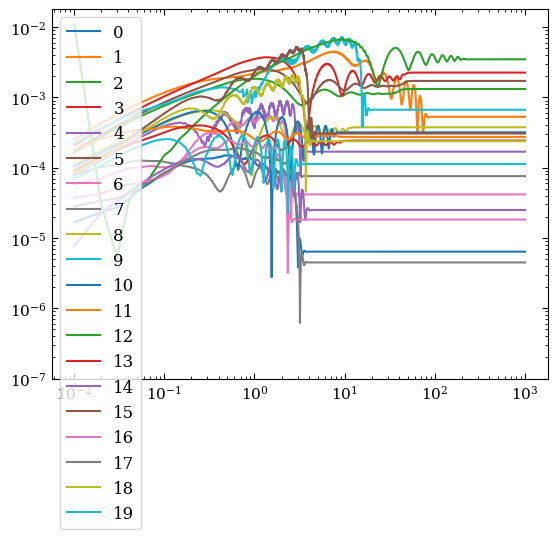

In [223]:
fig, ax = plt.subplots()
for i in range(len(test_weak_points)):
    ax.loglog(w_interp, np.abs(F_from_interpolation[i] - F_direct_calculation[i])/np.abs(mu[i][2]), label = str(i))
ax.set_ylim(1e-7, None)
ax.legend()

In [224]:
test_strong_points = np.array([strong_points[test_strong_points_indx]])[0]

F_from_interpolation_strong = []
F_direct_calculation_strong = []
mu_strong = []

for point in test_strong_points:
    y_interp = point[0]
    lp_interp = point[1]
    F, F_g, partitions, T_im, mu_im, u0, u1, u2, u3, um, w1, F1, w2, F2 = F_interp(w_interp, y_interp, lp_interp, interpolators, settings,
                return_geom = True, 
                )
    F_from_interpolation_strong.append(F)
    y = jnp.array([y_interp, 0])
    lens_params = jnp.array([lp_interp])
    F_interpolated, F_interp_raw, contour_obj, partitions = compute_F(w_interp, y, lens_params, T_funcs, helper_funcs, crit_funcs,
                N, T0_max)
    F_direct_calculation_strong.append(F_interpolated)
    mu_strong.append(mu_im)

(1e-07, 0.014622488604186228)

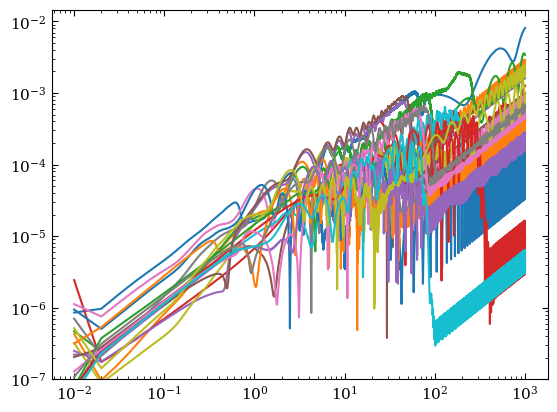

In [225]:
fig, ax = plt.subplots()
for i in range(len(test_strong_points)):
    ax.loglog(w_interp, np.abs(F_from_interpolation_strong[i] - F_direct_calculation_strong[i])/np.abs(mu_strong[i][2]), label = str(i))
ax.set_ylim(1e-7, None)

[0.51525424 9.16101695]


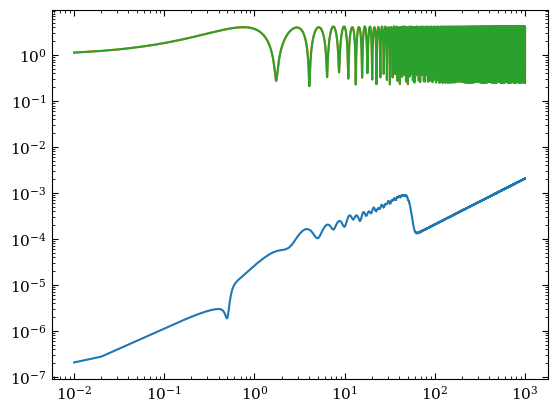

In [226]:
fig, ax = plt.subplots()

i = 15
print(test_strong_points[i])
ax.loglog(w_interp, np.abs(F_from_interpolation_strong[i] - F_direct_calculation_strong[i])/np.abs(mu_strong[i][2]), label = str(i))
ax.loglog(w_interp, np.abs(F_from_interpolation_strong[i]), label = str(i))
ax.loglog(w_interp, np.abs(F_direct_calculation_strong[i]), label = str(i))

[0.52241379 0.61206897]


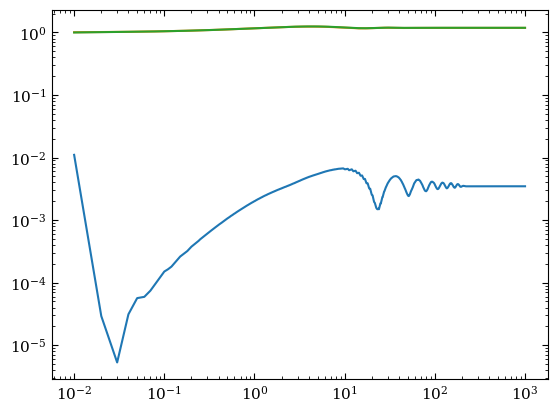

In [227]:
fig, ax = plt.subplots()

i = 12
print(test_weak_points[i])
ax.loglog(w_interp, np.abs(F_from_interpolation[i] - F_direct_calculation[i])/np.abs(mu[i][2]), label = str(i))
ax.loglog(w_interp, np.abs(F_from_interpolation[i]), label = str(i))
ax.loglog(w_interp, np.abs(F_direct_calculation[i]), label = str(i))

In [228]:
# use tex
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

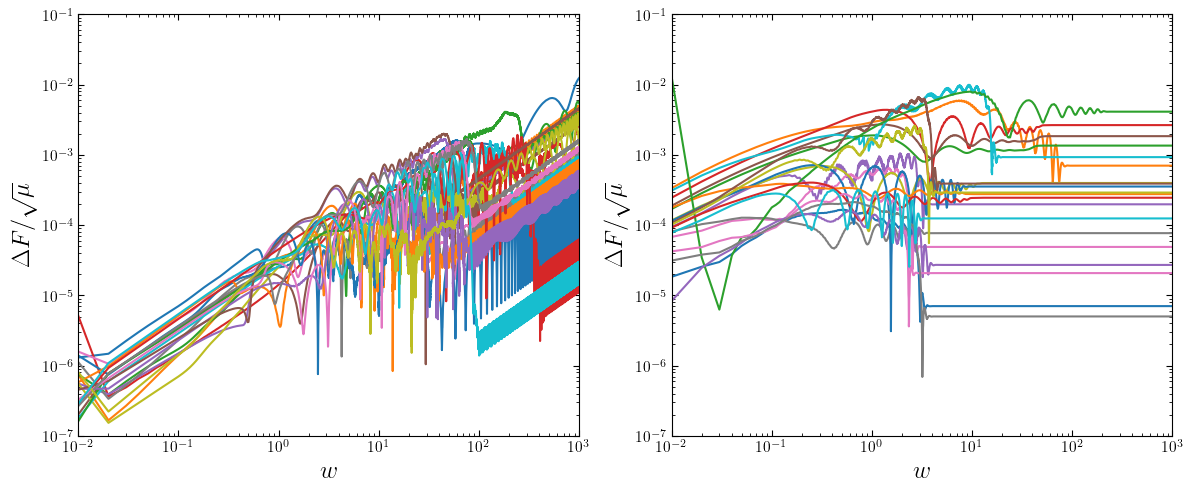

In [229]:
fig, axs = plt.subplots(1, 2, figsize = (12, 5))

ax = axs[1]

for i in range(len(test_weak_points)):
    ax.loglog(w_interp, np.abs(F_from_interpolation[i] - F_direct_calculation[i])/np.sqrt(np.abs(mu[i][2])), label = str(i))
ax.set_ylim(1e-7, 1e-1)
ax.set_xlim(1e-2, 1e3)
ax.set_ylabel(r'$\Delta F / \sqrt{\mu}$')
ax.set_xlabel(r'$w$')

ax = axs[0]

for i in range(len(test_strong_points)):
    ax.loglog(w_interp, np.abs(F_from_interpolation_strong[i] - F_direct_calculation_strong[i])/np.sqrt(np.abs(mu_strong[i][2])), label = str(i))
ax.set_ylim(1e-7, 1e-1)
ax.set_xlim(1e-2, 1e3)
ax.set_ylabel(r'$\Delta F / \sqrt{\mu}$')
ax.set_xlabel(r'$w$')

fig.tight_layout()
plt.savefig('./plots/interpolation_error.pdf', bbox_inches = 'tight')

Text(0.5, 1.0, 'NFW profile')

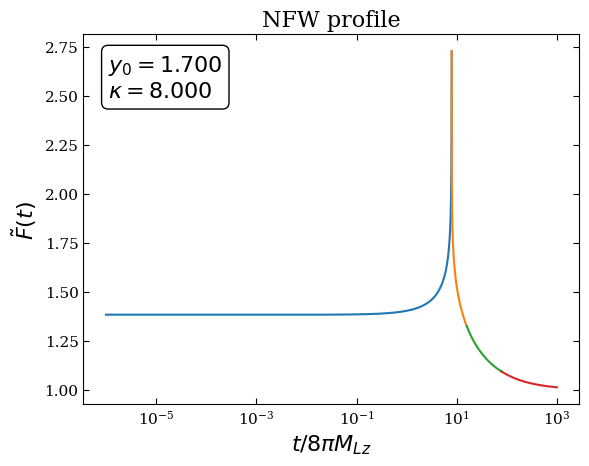

In [ ]:
fig, ax = plt.subplots()

for i in range(4):
    ax.plot(contour_obj.T0_min_out_segments[i],
                contour_obj.u_min_out[i])
ax.plot(contour_obj.T0_sad_max_segment,
            contour_obj.u_sad_max)
ax.set_xscale('log')

ax.set_xlabel(r'$t/8 \pi M_{Lz}$', fontsize = 16)
ax.set_ylabel(r'$\tilde{F}(t)$', fontsize = 16)

ax.text(0.05, 0.95, r'$y_0 = ' + f'{y[0]:.3f}' + r'$' + '\n' + r'$\kappa = ' + f'{lens_params[0]:.3f}' + r'$',
        transform=ax.transAxes, fontsize=16,
        verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.)) 

ax.set_title('NFW profile', fontsize = 16)


# plt.savefig(f'./plots/NFW_Ft_y_{y[0]:.3f}_kappa_{lens_params[0]:.3f}.png', transparent = False, facecolor = 'white',
#              dpi = 200, bbox_inches = 'tight')

Text(0.5, 1.0, 'NFW profile')

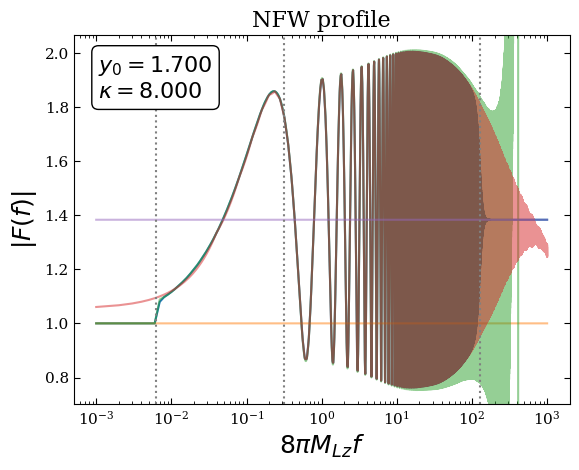

In [ ]:
fig, ax = plt.subplots()

ax.semilogx(w_interp, jnp.abs(F_interp))
ax.set_xlim(*ax.get_xlim())
ax.set_ylim(*ax.get_ylim())
for F_interp_raw_i in F_interp_raw:
    ax.semilogx(w_interp, jnp.abs(F_interp_raw_i), alpha = 0.5)
for partition in partitions:
    if w_interp[0] < partition < w_interp[-1]:
        ax.axvline(partition, color = 'gray', linestyle = ':')

ax.set_xlabel(r'$8 \pi M_{Lz} f$')
ax.set_ylabel(r'$|F(f)|$')

ax.text(0.05, 0.95, r'$y_0 = ' + f'{y[0]:.3f}' + r'$' + '\n' + r'$\kappa = ' + f'{lens_params[0]:.3f}' + r'$',
        transform=ax.transAxes, fontsize=16,
        verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.)) 


ax.set_title('NFW profile', fontsize = 16)


# plt.savefig(f'./plots/NFW_Fw_y_{y[0]:.3f}_kappa_{lens_params[0]:.3f}.png', transparent = False, facecolor = 'white',
        #      dpi = 200, bbox_inches = 'tight')

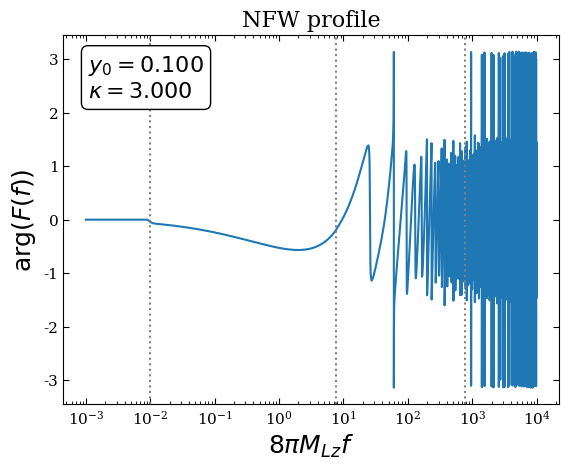

In [ ]:
fig, ax = plt.subplots()

ax.semilogx(w_interp, jnp.angle(F_interp))
for partition in partitions:
    if w_interp[0] < partition < w_interp[-1]:
        ax.axvline(partition, color = 'gray', linestyle = ':')

ax.set_xlabel(r'$8 \pi M_{Lz} f$')
ax.set_ylabel(r'${\rm arg}(F(f))$')

ax.text(0.05, 0.95, r'$y_0 = ' + f'{y[0]:.3f}' + r'$' + '\n' + r'$\kappa = ' + f'{lens_params[0]:.3f}' + r'$',
        transform=ax.transAxes, fontsize=16,
        verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.)) 


ax.set_title('NFW profile', fontsize = 16)


plt.savefig(f'./plots/NFW_Fw_y_{y[0]:.3f}_kappa_{lens_params[0]:.3f}_phase.png', transparent = False, facecolor = 'white',
             dpi = 200, bbox_inches = 'tight')

# Generalized SIS profile

In [ ]:
@jit
def Psi_gSIS(x, lens_params):
    k = lens_params[0]
    return jnp.linalg.norm(x)**(2 - k)/(2 - k)

In [ ]:
def y_crit_override_gSIS(y_crit, lens_params):
    if lens_params[0] == 1.:
        return 1.
    elif lens_params[0] > 1.:
        return jnp.inf
    else:
        return y_crit

In [ ]:
T_funcs, helper_funcs = amplification_computation_prep(Psi_gSIS)
crit_curve_helper_funcs = make_crit_curve_helper_func(T_funcs)

In [ ]:
param_arr = jnp.linspace(0.1, 1.9, 100000)
crit_funcs = crtical_curve_interpolants(param_arr, T_funcs, crit_curve_helper_funcs)
crit_funcs_np = crtical_curve_interpolants_np(param_arr, T_funcs, crit_curve_helper_funcs)

with open('./interpolation/crit_funcs/gSIS_crit_funcs_0.100_1.900.pkl', 'wb') as f:
    pickle.dump(crit_funcs_np, f)

In [ ]:
N = 200
T0_max = 1000.

In [ ]:
bisection_1D_var_2D = make_bisection_1D_var_2D()
bisection_1D_cond_fun = make_bisection_1D_cond_fun(1e-13)
bisection_1D_step_fun = make_bisection_1D_step_fun(T_funcs["dT_1D"])

# @partial(jnp.vectorize, signature = '(3),(),()->(3)')
def x_im_nan_sub_gSIS(x_im, y0, lens_params):
    lens_params = jnp.atleast_1d(lens_params)
    x_im = jax.lax.cond(jnp.isnan(x_im[0]) & (lens_params[0] > 1.), 
                        lambda x_im: x_im.at[0].set(
                            bisection_1D_var_2D(T_funcs["dT_1D"], 0., 
                                                -0.1, -1e-14, 
                                                bisection_1D_cond_fun, 
                                                bisection_1D_step_fun, 
                                                y0, lens_params[0])
                        ), 
                        lambda x_im: x_im, 
                        operand = x_im)
    x_im = jax.lax.cond(jnp.isnan(x_im[1]) & (lens_params[0] < 1.), 
                        lambda x_im: x_im.at[1].set(
                            bisection_1D_var_2D(T_funcs["dT_1D"], 0., 
                                                -0.1, -1e-14, 
                                                bisection_1D_cond_fun, 
                                                bisection_1D_step_fun, 
                                                y0, lens_params[0])
                        ), 
                        lambda x_im: x_im, 
                        operand = x_im)
    return x_im

In [ ]:
3.12166667, 1.09
3.20333333, 1.09

(3.20333333, 1.09)

In [ ]:
y =jnp.array([3.20333333, 0.])
lens_params = jnp.array([1.09])

def origin_type_gSIS(lens_params):
    if lens_params[0] < 1.:
        origin = 'regular'
    else:
        origin = 'cusp'
    return origin

In [ ]:
w_interp = jnp.linspace(1e-3, 1e4, 10**6)

In [ ]:
# xs = jnp.linspace(-1.5, 1.5, 100)
# plt.plot(xs, T_funcs["dT_1D"](xs, y[0], lens_params))

In [ ]:
F_interp, contour_obj, partitions = compute_F(w_interp, y, lens_params, T_funcs, helper_funcs, crit_funcs,
              N, T0_max, t_fft_long_max_fac = 5000, origin_type = origin_type_gSIS, y_crit_override = y_crit_override_gSIS,
              x_im_nan_sub = x_im_nan_sub_gSIS)

[-6.29417805e-12             nan  1.25075819e+00] [8.69697531 8.69697608 0.        ]


Text(0.05, 0.95, '$y_0 = 3.203$\n$\\kappa = 1.090$')

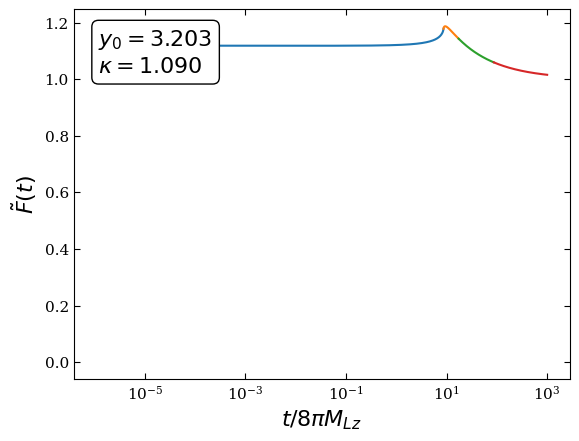

In [ ]:
fig, ax = plt.subplots()

for i in range(4):
    ax.plot(contour_obj.T0_min_out_segments[i],
                contour_obj.u_min_out[i])
ax.plot(contour_obj.T0_sad_max_segment,
            contour_obj.u_sad_max)
ax.set_xscale('log')

ax.set_xlabel(r'$t/8 \pi M_{Lz}$', fontsize = 16)
ax.set_ylabel(r'$\tilde{F}(t)$', fontsize = 16)

ax.text(0.05, 0.95, r'$y_0 = ' + f'{y[0]:.3f}' + r'$' + '\n' + r'$\kappa = ' + f'{lens_params[0]:.3f}' + r'$',
        transform=ax.transAxes, fontsize=16,
        verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.)) 

Text(0.5, 1.0, 'gSIS profile')

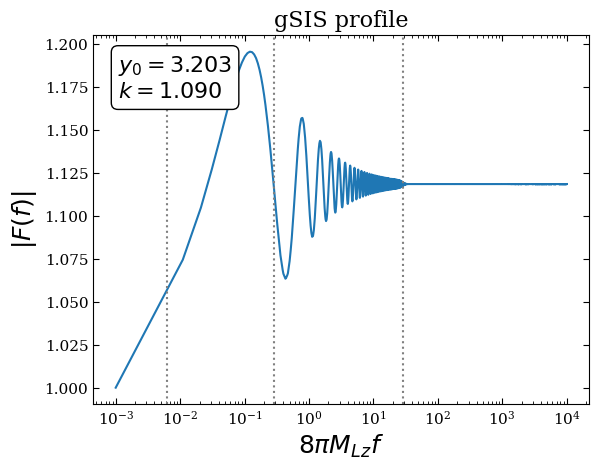

In [ ]:
fig, ax = plt.subplots()
ax.semilogx(w_interp, jnp.abs(F_interp))
for partition in partitions:
    if w_interp[0] < partition < w_interp[-1]:
        ax.axvline(partition, color = 'gray', linestyle = ':')

ax.set_xlabel(r'$8 \pi M_{Lz} f$')
ax.set_ylabel(r'$|F(f)|$')

ax.text(0.05, 0.95, r'$y_0 = ' + f'{y[0]:.3f}' + r'$' + '\n' + r'$k = ' + f'{lens_params[0]:.3f}' + r'$',
        transform=ax.transAxes, fontsize=16,
        verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.)) 

ax.set_title('gSIS profile', fontsize = 16)

# plt.savefig(f'./plots/gSIS_Fw_y_{y[0]:.3f}_k_{lens_params[0]:.3f}.png', transparent = False, facecolor = 'white',
#                 dpi = 200, bbox_inches = 'tight')

# cored SIS profile

In [ ]:
@jit
def Psi_CIS(x, lens_params):
    x_c = jnp.abs(lens_params[0])
    x_t = jnp.sqrt(x_c**2 + jnp.linalg.norm(x)**2)
    x_c_safe = jnp.where(x_c > 1e-15, x_c, 1e-15)
    Psi = jnp.where(x_c > 1e-15, 
            x_t + x_c_safe * jnp.log(2 * x_c_safe / (x_t + x_c_safe)), 
            x_t
                    )
    return Psi

In [ ]:
def y_crit_override_CIS(y_crit, lens_params):
    if lens_params[0] < 1e-15:
        return 1.
    else:
        return y_crit

In [ ]:
def origin_type_CIS(lens_params):
    if jnp.abs(lens_params[0]) > 1e-15:
        origin = 'regular'
    else:
        origin = 'cusp'
    return origin

In [ ]:
T_funcs, helper_funcs = amplification_computation_prep(Psi_CIS)
crit_curve_helper_funcs = make_crit_curve_helper_func(T_funcs)

In [ ]:
param_arr = jnp.linspace(0., 1., 100000)
crit_funcs_np = crtical_curve_interpolants_np(param_arr, T_funcs, crit_curve_helper_funcs)

with open('./interpolation/crit_funcs/CIS_crit_funcs_0.100_1.000.pkl', 'wb') as f:
    pickle.dump(crit_funcs_np, f)

In [ ]:
add_indxs = jnp.where(param_arr < 1e-15)[0]
param_arr = param_arr[param_arr >= 1e-15]
crit_funcs = crtical_curve_interpolants(param_arr, T_funcs, crit_curve_helper_funcs, add_y = jnp.array([1.]), 
                                        add_x = jnp.array([0.]), add_param = jnp.array([0.]), add_indxs = add_indxs)

In [ ]:
bisection_1D_var_2D = make_bisection_1D_var_2D()
bisection_1D_cond_fun = make_bisection_1D_cond_fun(1e-13)
bisection_1D_step_fun = make_bisection_1D_step_fun(T_funcs["dT_1D"])

# @partial(jnp.vectorize, signature = '(3),(),()->(3)')
def x_im_nan_sub_CIS(x_im, y0, lens_params):
    lens_params = jnp.atleast_1d(lens_params)
    x_im = jax.lax.cond(jnp.isnan(x_im[1]) & (lens_params[0] > 0) & (y0 < 1.),
                        lambda x_im: x_im.at[1].set(
                            bisection_1D_var_2D(T_funcs["dT_1D"], 0., 
                                                -0.1, -1e-14, 
                                                bisection_1D_cond_fun, 
                                                bisection_1D_step_fun, 
                                                y0, lens_params[0])
                        ), 
                        lambda x_im: x_im, 
                        operand = x_im)
    return x_im

In [ ]:
N = 200
T0_max = 1000.

In [ ]:
y = jnp.array([0.1, 0.])
lens_params = jnp.array([0.5])

In [ ]:
w_interp = jnp.linspace(1e-3, 1e4, 10**6)

In [ ]:
F_interp, contour_obj, partitions = compute_F(w_interp, y, lens_params, T_funcs, helper_funcs, crit_funcs,
              N, T0_max, origin_type = origin_type_CIS, x_im_nan_sub = x_im_nan_sub_CIS,
            #   y_crit_override = y_crit_override_CIS
              )

overrode
0.01 100.0
0 0.01 0.01 100.0
13 0.04282417110679023 0.01 0.5124623115577889
91 0.042608473036123265 0.04029923486780636 0.045349107345774096
106 0.042610130780680565 0.04258309679251539 0.04263384927973114
55 0.04261001671862753 0.042609875743056365 0.042610385818304765
0.04261001671862753
[ 0.          0.         12.00076156] [0. 0. 0.]


Text(0.05, 0.95, '$y_0 = 0.100$\n$\\kappa = 0.500$')

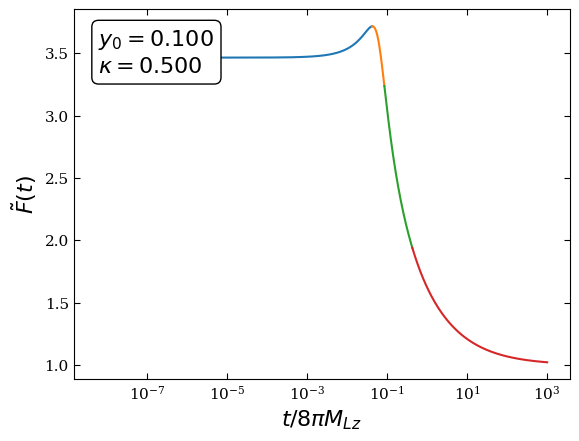

In [ ]:
fig, ax = plt.subplots()

for i in range(4):
    ax.plot(contour_obj.T0_min_out_segments[i],
                contour_obj.u_min_out[i])
ax.plot(contour_obj.T0_sad_max_segment,
            contour_obj.u_sad_max)
ax.set_xscale('log')

ax.set_xlabel(r'$t/8 \pi M_{Lz}$', fontsize = 16)
ax.set_ylabel(r'$\tilde{F}(t)$', fontsize = 16)

ax.text(0.05, 0.95, r'$y_0 = ' + f'{y[0]:.3f}' + r'$' + '\n' + r'$\kappa = ' + f'{lens_params[0]:.3f}' + r'$',
        transform=ax.transAxes, fontsize=16,
        verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.)) 

Text(0.5, 1.0, 'CIS profile')

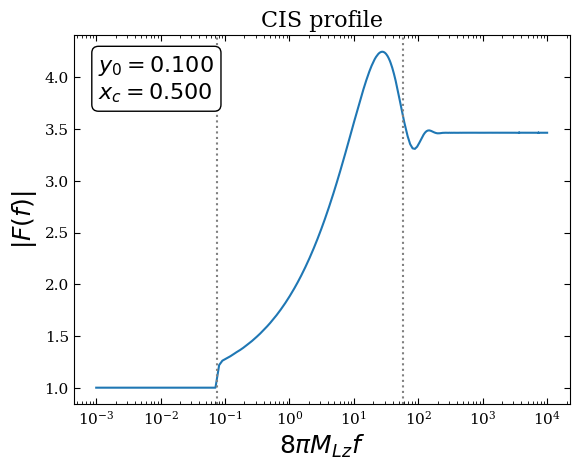

In [ ]:
fig, ax = plt.subplots()
ax.semilogx(w_interp, jnp.abs(F_interp))
for partition in partitions:
    if w_interp[0] < partition < w_interp[-1]:
        ax.axvline(partition, color = 'gray', linestyle = ':')

ax.set_xlabel(r'$8 \pi M_{Lz} f$')
ax.set_ylabel(r'$|F(f)|$')

ax.text(0.05, 0.95, r'$y_0 = ' + f'{y[0]:.3f}' + r'$' + '\n' + r'$x_c = ' + f'{lens_params[0]:.3f}' + r'$',
        transform=ax.transAxes, fontsize=16,
        verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.))

ax.set_title('CIS profile', fontsize = 16)

# plt.savefig(f'./plots/CIS_Fw_y_{y[0]:.3f}_xc_{lens_params[0]:.3f}.png', transparent = False, facecolor = 'white',
#                 dpi = 200, bbox_inches = 'tight')

# Plummer profile

In [ ]:
@jit
def Psi_plummer(x, lens_params):
    kappa = lens_params[0]
    return kappa / 2 * jnp.log(1 + jnp.linalg.norm(x)**2)

In [ ]:
T_funcs, helper_funcs = amplification_computation_prep(Psi_plummer)
crit_curve_helper_funcs = make_crit_curve_helper_func(T_funcs)

In [ ]:
param_arr = jnp.linspace(0.1, 10., 100000)
crit_funcs = crtical_curve_interpolants(param_arr, T_funcs, crit_curve_helper_funcs)

In [ ]:
N = 200
T0_max = 1000.

In [ ]:
y =jnp.array([0.5, 0.])
lens_params = jnp.array([4.0])

In [ ]:
w_interp = jnp.linspace(1e-3, 1e4, 10**7)

In [ ]:
F_interp, contour_obj, partitions = compute_F(w_interp, y, lens_params, T_funcs, helper_funcs, crit_funcs,
              N, T0_max)

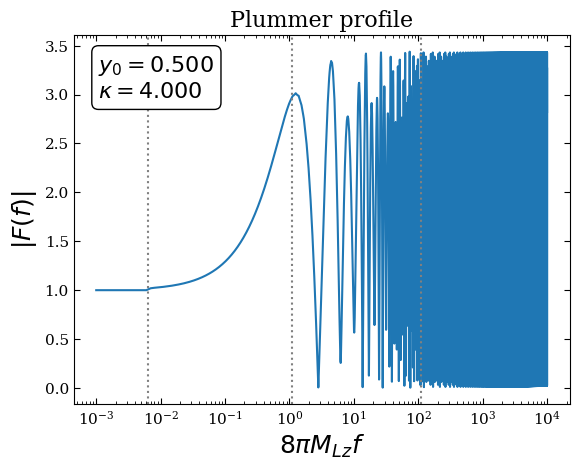

In [ ]:
fig, ax = plt.subplots()
ax.semilogx(w_interp, jnp.abs(F_interp))
for partition in partitions:
    if w_interp[0] < partition < w_interp[-1]:
        ax.axvline(partition, color = 'gray', linestyle = ':')


ax.set_xlabel(r'$8 \pi M_{Lz} f$')
ax.set_ylabel(r'$|F(f)|$')

ax.text(0.05, 0.95, r'$y_0 = ' + f'{y[0]:.3f}' + r'$' + '\n' + r'$\kappa = ' + f'{lens_params[0]:.3f}' + r'$',
        transform=ax.transAxes, fontsize=16,
        verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.))

ax.set_title('Plummer profile', fontsize = 16)


plt.savefig(f'./plots/Plummer_Fw_y_{y[0]:.3f}_kappa_{lens_params[0]:.3f}.png', transparent = False, facecolor = 'white',
                dpi = 200, bbox_inches = 'tight')